In [48]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import os

Because my paper is written in Font Helvetica 11p, I needed to install it, so that the font in the figure matches the font in the paper.

In [ ]:
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')  # Lists all available fonts

In [17]:
# Read the Excel file into a DataFrame
df = pd.read_excel("ranking_table.xlsx")
df

,Papers,Aim,Writing,Figures,Accessibility,Hypotheses derivation,Methods,Interpretation,Misconduct,Preregistered,(Conceptual) Replication,Novelty,Reproducible,Reference
0,Engbert & Kliegl (2003),0.5,0.25,0.5,0.0,0.0,1.00,1.00,1,0.5,1,1.0,1,"Engbert, R., & Kliegl, R. (2003). Microsaccade..."
1,Luck & Vogel (1997),0.5,0.50,1.0,0.5,0.5,0.75,0.75,1,0.5,1,0.5,1,"Luck, S. J., & Vogel, E. K. (1997). The capaci..."
2,Griffin & Nobre (2003),1.0,0.50,0.5,0.5,0.5,0.50,0.75,1,0.5,1,1.0,1,"Griffin, I. C., & Nobre, A. C. (2003). Orienti..."
3,Masuda & Nisbett (2001),0.5,0.75,0.5,1.0,0.5,0.25,0.25,0,0.5,0,1.0,0,"Masuda, T., & Nisbett, R. E. (2001). Attending..."
4,Cunningham & Wolfe (2014),1.0,0.25,0.0,0.5,0.0,0.50,0.25,1,0.5,1,0.5,0,"Cunningham, C. A., & Wolfe, J. M. (2014). The ..."
5,Busch et al. (2009),1.0,0.50,0.5,0.0,1.0,1.00,0.75,1,0.5,1,0.5,1,NaN
6,Song et al. (2021),0.5,0.75,0.5,0.5,0.5,0.75,0.25,1,1.0,0,0.5,1,"Song, P., Zha, M., Yang, Q., Zhang, Y., Li, X...."
7,Gresch et al. (2024),1.0,0.75,1.0,0.5,1.0,0.75,0.75,1,0.5,1,0.5,1,"Gresch, D., Boettcher, S. E. P., van Ede, F., ..."
8,Rosenholtz (2024),0.5,0.75,0.5,0.5,0.5,0.50,0.50,1,1.0,0,0.5,1,NaN


This step flips the table. It made sense to me to flip it, because working on it in excel was more convenient the other way around, but I want it to be displayed with the papers' authors as columns in the paper. 

In [18]:
# Transpose the DataFrame (flip rows and columns)
df_transposed = df.transpose()
# Optional: reset headers if needed — the first row after transposition becomes new headers
# Uncomment if appropriate:
df_transposed.columns = df_transposed.iloc[0]  # set first row as header
df_transposed = df_transposed[1:]              # remove the first row from data
# Fill NaNs with 0 for computation
df_filled = df_transposed.fillna(0)
#drop reference row
df_filled = df_filled.drop("Reference", axis=0)
# Display or inspect the transposed DataFrame
df_filled

C:\Users\nadja\AppData\Local\Temp\ipykernel_6684\257853805.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled = df_transposed.fillna(0)


Papers,Engbert & Kliegl (2003),Luck & Vogel (1997),Griffin & Nobre (2003),Masuda & Nisbett (2001),Cunningham & Wolfe (2014),Busch et al. (2009),Song et al. (2021),Gresch et al. (2024),Rosenholtz (2024)
Aim,0.5,0.5,1.0,0.5,1.0,1.00,0.5,1.0,0.50
Writing,0.25,0.5,0.5,0.75,0.25,0.50,0.75,0.75,0.75
Figures,0.5,1.0,0.5,0.5,0.0,0.50,0.5,1.0,0.50
Accessibility,0.0,0.5,0.5,1.0,0.5,0.00,0.5,0.5,0.50
Hypotheses derivation,0.0,0.5,0.5,0.5,0.0,1.00,0.5,1.0,0.50
Methods,1.0,0.75,0.5,0.25,0.5,1.00,0.75,0.75,0.50
Interpretation,1.0,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.50
Misconduct,1,1,1,0,1,1.00,1,1,1.00
Preregistered,0.5,0.5,0.5,0.5,0.5,0.50,1.0,0.5,1.00
(Conceptual) Replication,1,1,1,0,1,1.00,0,1,0.00


This steps introduces the weights and multiplications/additions of the variables (devided for clarity, soundness and further scientific value). For more information, check the paper. 

In [23]:
# --- Step 1: Sum up Clarity (weighted average of values in range 0 to 1) ---
clarity_weights = {
    "Aim": 2/10,
    "Writing": 4/10,
    "Figures": 3/10,
    "Accessibility": 1/10
}
clarity_score = sum(df_filled.loc[item] * weight for item, weight in clarity_weights.items())

# --- Step 2: Soundness & Misconduct (weighted average of values in range 0 to 1) ---
soundness_weights = {
    "Hypotheses derivation": 3/10,
    "Methods": 3/10,
    "Interpretation": 4/10
}
soundness = sum(df_filled.loc[item] * weight for item, weight in soundness_weights.items())
misconduct_score = df_filled.loc["Misconduct"] * soundness

# --- Step 3: Scientific Value & Preregistered (weighted average of values in range 0 to 1) ---
sci_weights = {
    "(Conceptual) Replication": 1/3,
    "Novelty": 2/3
}
sci_value = sum(df_filled.loc[item] * weight for item, weight in sci_weights.items())
prereg_score = df_filled.loc["Preregistered"] * sci_value

# --- Step 4: Reproducibility ---
reproducibility_score = df_filled.loc["Reproducible"] * prereg_score

# --- Step 5: Total Score (weighted average of values in range 0 to 1) ---
total_score = (
    clarity_score * (1/5) + 
    misconduct_score * (1/2) + 
    reproducibility_score * (3/10)
)

# --- Add to DataFrame ---
df_filled.loc["Total score"] = total_score
# --- save to excel ---
df_filled.to_excel("Scored Table.xlsx")
df_filled

Papers,Engbert & Kliegl (2003),Luck & Vogel (1997),Griffin & Nobre (2003),Masuda & Nisbett (2001),Cunningham & Wolfe (2014),Busch et al. (2009),Song et al. (2021),Gresch et al. (2024),Rosenholtz (2024)
Aim,0.5,0.5,1.0,0.5,1.0,1.00,0.5,1.0,0.50
Writing,0.25,0.5,0.5,0.75,0.25,0.50,0.75,0.75,0.75
Figures,0.5,1.0,0.5,0.5,0.0,0.50,0.5,1.0,0.50
Accessibility,0.0,0.5,0.5,1.0,0.5,0.00,0.5,0.5,0.50
Hypotheses derivation,0.0,0.5,0.5,0.5,0.0,1.00,0.5,1.0,0.50
Methods,1.0,0.75,0.5,0.25,0.5,1.00,0.75,0.75,0.50
Interpretation,1.0,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.50
Misconduct,1,1,1,0,1,1.00,1,1,1.00
Preregistered,0.5,0.5,0.5,0.5,0.5,0.50,1.0,0.5,1.00
(Conceptual) Replication,1,1,1,0,1,1.00,0,1,0.00


In [49]:
# Set Helvetica 11pt as default font
try:
    # Try to load Helvetica (works if installed)
    font_path = 'C:\\Windows\\Fonts\\helvetica.ttf'  # Common Windows path
    font_manager.fontManager.addfont(font_path)
    plt.rcParams['font.family'] = 'Helvetica'
except:
    # Fallback to Arial (nearly identical to Helvetica on Windows)
    plt.rcParams['font.family'] = 'Arial'

plt.rcParams.update({
    'font.size': 11,          # Default font size
    'axes.titlesize': 11,     # Title font size
    'axes.labelsize': 11,     # Axis label font size
    'xtick.labelsize': 11,    # X-axis tick labels
    'ytick.labelsize': 11,    # Y-axis tick labels
    'legend.fontsize': 10     # Slightly smaller legend
})

This step makes an APA 7 sized plot out of the rated studies and ranks them from best rated to worst. It uses a colourblind-friendly colour scheme. 

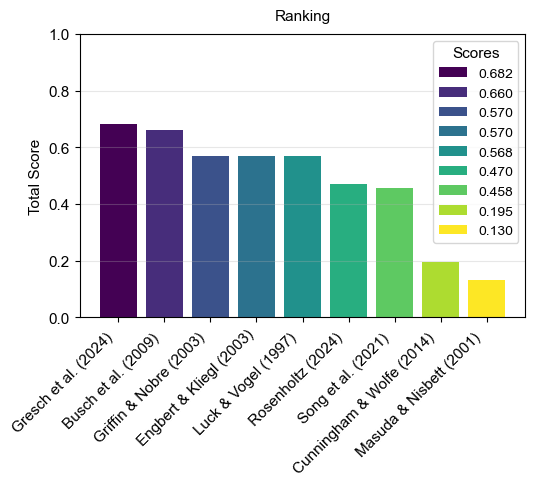

In [50]:
# Copy dataframe and prepare data
df_plot = df_filled.loc[['Total score']].T.sort_values('Total score', ascending=False)

# Create plot with ONE figure declaration
plt.figure(figsize=(5.5, 5))  # Set size here (only once!)

# Plot bars
bars = plt.bar(x=df_plot.index, 
               height=df_plot['Total score'],
               color=plt.cm.viridis(np.linspace(0, 1, len(df_plot))))

# Customize plot
plt.title('Ranking', pad=10)  # Reduced padding for smaller figure
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1.0)

# Add legend (simplified)
plt.legend(bars, [f"{score:.3f}" for score in df_plot['Total score']],
           bbox_to_anchor=(1, 1),
           title="Scores")

# Save and show
plt.tight_layout()  # Call this BEFORE savefig
plt.savefig('plot_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

The end.